# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [1]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
df = df.replace(np.nan,0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [2]:
df = df[(df["SalePrice"] <= df["SalePrice"].quantile(.95)) & (df["SalePrice"] >= df["SalePrice"].quantile(.05))]

In [3]:
# y = df["price"]
# x = df[["bedrooms","sqft_lot"]]
def lr(x,y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

    m1 = model.fit(X_train, Y_train)

    y_test_prediction = model.predict(X_test)
    MSE = mean_squared_error(Y_test, y_test_prediction)
    RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
    R2 = r2_score(Y_test, y_test_prediction)
    return MSE,RMSE,R2,m1.coef_,m1.intercept_
    

In [4]:
df["lnPrice"] = df["SalePrice"].apply(np.log)
y = df["lnPrice"]
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

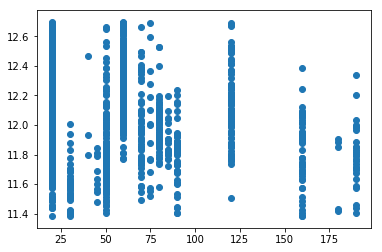

In [5]:
#plt.scatter(df["RoofMatl"].replace(0,""),df["lnPrice"])

plt.scatter(df["MSSubClass"],df["lnPrice"])


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lnPrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216


## neighborhood

In [7]:
df_neighborhoods= pd.get_dummies(df["Neighborhood"])


lr(x=df_neighborhoods, y = y )

(0.04034673242355372,
 0.20086496066649784,
 0.5137092641543002,
 array([-1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13, -1.5743923e+13, -1.5743923e+13, -1.5743923e+13,
        -1.5743923e+13]),
 15743923022400.076)

## MSZoning

In [8]:
## MSZoning

df_MSZoning= pd.get_dummies(df["Neighborhood"])



lr(x=df_MSZoning, y = y )

(0.03131160686493622,
 0.176950860028812,
 0.5828515775071264,
 array([1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13, 1.11205417e+13, 1.11205417e+13, 1.11205417e+13,
        1.11205417e+13]),
 -11120541745056.395)

## Sale Condition

In [9]:
df_SaleCondition= pd.get_dummies(df["SaleCondition"])


lr(x=df_SaleCondition, y = y )

(0.08687938160976079,
 0.2947530858358582,
 0.015514685192319688,
 array([-0.08051201, -0.20478993, -0.02982882, -0.06035359,  0.05107727,
         0.32440708]),
 11.954744342877476)

## Has Pool

In [10]:
df_hasPool = df["PoolArea"].apply(lambda x: 1 if x>0 else 0)


lr(x=np.array(df_hasPool).reshape(-1,1), y = y )

(0.09910963650594978,
 0.31481683008687733,
 -5.003295056704715e-06,
 array([0.22410603]),
 12.019156386213842)

## HouseSTyle

In [11]:
df_HouseStyle = pd.get_dummies(df["HouseStyle"])


lr(x=df_SaleCondition, y = y )

(0.08753682519416314,
 0.2958662285462184,
 0.0915027799021415,
 array([-0.08315689, -0.20088017, -0.02591907, -0.05746212,  0.05945194,
         0.3079663 ]),
 11.950834584461585)

## OverallCond

In [12]:
df_OverallCond = pd.get_dummies(df["OverallCond"])


lr(x=df_OverallCond, y = y )

(0.08341530039772556,
 0.28881707082117836,
 0.07067475472003681,
 array([-0.16482858, -0.18847877,  0.17806632, -0.01004956,  0.01008195,
        -0.02021166,  0.19542029]),
 11.927251430084382)

## OverallQual

In [13]:
lr(x=pd.concat([df["OverallCond"], df["OverallQual"],df["OverallCond"] * df["OverallQual"]], axis=1), y = y )

(0.03443563272925908,
 0.1855684044476836,
 0.6115805830237688,
 array([ 0.01524921,  0.20840802, -0.00291607]),
 10.770954815894992)

In [14]:
lr(x=pd.concat([df["OverallQual"]],axis=1),y=y)

(0.03452477416040799,
 0.18580843404002947,
 0.6125809908944742,
 array([0.19161722]),
 10.858802401493914)

In [15]:
lr(x=pd.concat([df["TotRmsAbvGrd"]],axis=1),y=y)

(0.06134626390715,
 0.2476817795219301,
 0.2668586130569721,
 array([0.08353705]),
 11.478908505627594)

In [16]:
#Thermometer
#df_OverallQual.head()
df["OverallQual"]

0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
31       5
32       8
        ..
1427     5
1428     5
1429     6
1430     5
1431     6
1433     6
1434     5
1435     6
1436     4
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1316, dtype: int64

## Exterior Quality

In [17]:
df_ExterQual = pd.get_dummies(df["ExterQual"])


lr(x=df_ExterQual, y = y )

(0.05758743895472296,
 0.23997382972883305,
 0.36175321446186914,
 array([ 0.39465956, -0.37570435,  0.18533088, -0.20428609]),
 12.081335352491667)

In [18]:
lr(x=pd.concat([df_ExterQual,df_OverallQual],axis=1), y = y )

NameError: name 'df_OverallQual' is not defined

## Year Sold

In [19]:
df_YearSold = pd.get_dummies(df["YrSold"])


lr(x=df_YearSold, y = y )

(0.09954122264137877,
 0.3155015414247271,
 -0.006676005839779897,
 array([ 0.00171052,  0.01268272,  0.00021603, -0.00877577, -0.00583349]),
 12.01639911121054)

## BLDGType

In [20]:
df_BldgType = pd.get_dummies(df["BldgType"])


lr(x=df_BldgType, y = y )

(0.08341446124463543,
 0.2888156180760234,
 0.04703361127059014,
 array([-2.71866646e+13, -2.71866646e+13, -2.71866646e+13, -2.71866646e+13,
        -2.71866646e+13]),
 27186664582641.836)

In [21]:
df["MasVnrType"]= df["MasVnrType"].replace(0,"")
df_MasVnrType = pd.get_dummies(df["MasVnrType"])


lr(x=df_MasVnrType, y = y )

(0.06526014366565698,
 0.25546064993586975,
 0.20922743698623125,
 array([ 0.13864367, -0.241056  ,  0.03291163, -0.14482644,  0.21432715]),
 12.082876709595073)

## ScreenPorch

In [22]:
df_hasScreenPorch = df["ScreenPorch"].apply(lambda x : 1 if x >0 else 0)
df_SP = pd.concat([df["ScreenPorch"],df_hasScreenPorch],axis=1 )


lr(x=df_SP, y = y )

(0.09811812854630353,
 0.31323813392737404,
 0.013055217499992944,
 array([ 0.00125697, -0.16088514]),
 12.01416988594431)

In [23]:
df_Condition1 = pd.get_dummies(df["Condition1"])


lr(x=df_Condition1, y = y )


(0.09088543561616208,
 0.30147211416010283,
 0.03092123106235478,
 array([3.64658939e+13, 3.64658939e+13, 3.64658939e+13, 3.64658939e+13,
        3.64658939e+13, 3.64658939e+13, 3.64658939e+13, 3.64658939e+13,
        3.64658939e+13]),
 -36465893928197.625)

LotShape

In [24]:
df_LotShape =  pd.get_dummies(df["LotShape"])



lr(x=df_LotShape, y = y )

(0.0845250874017544,
 0.29073198551544754,
 0.08128408096581496,
 array([-0.00804731,  0.05846558,  0.14359423, -0.1940125 ]),
 12.147592422024566)

## LotConfig

In [26]:
df_LandShape =  df["df_LandShape"y(lambda x : 1 if x >0 else 0)



lr(x=df_LotConfig, y = y )

SyntaxError: invalid syntax (<ipython-input-26-d6ddc6afc487>, line 1)

# Basics

In [27]:
lr(x=np.array(df["GarageCars"]).reshape(-1,1), y = y )

(0.05743455049659471,
 0.23965506566019987,
 0.3849871945903064,
 array([0.27285358]),
 11.537331888546085)

In [28]:
lr(x=np.array(df["Fireplaces"]).reshape(-1,1), y = y )

(0.07009174895643738,
 0.26474846355821857,
 0.23134346192219557,
 array([0.19978062]),
 11.898180639410766)

In [29]:
lr(x=np.array(df["MSSubClass"]).reshape(-1,1), y = y )

(0.1026498184381362,
 0.32039010352714736,
 -0.004381273581241629,
 array([-0.00044855]),
 12.048338606311987)

In [30]:
lr(x=df[["FullBath","HalfBath"]],y=y)

(0.059189320025874646,
 0.2432885530103598,
 0.4172076685172774,
 array([0.30666147, 0.12503234]),
 11.48865579265501)

In [31]:

baths = df["BsmtFullBath"]+df["BsmtHalfBath"]+df["FullBath"]+df["HalfBath"]


lr(x=np.array(baths).reshape(-1,1), y = y )

(0.04983510889365201,
 0.22323778554190152,
 0.4122273267142129,
 array([0.20448704]),
 11.525870430258138)

In [32]:
df_roof= pd.get_dummies(df["RoofStyle"])
lr(x=df_roof, y = y )

(0.0926870726488948,
 0.30444551671669395,
 -0.017768521438608964,
 array([ 0.08712516, -0.10054511, -0.13188899, -0.01741435, -0.04572979,
         0.20845309]),
 12.103155038705571)

## Central Air

In [33]:
df['CentralAir']=df['CentralAir'].replace("N",0)
df['CentralAir']=df['CentralAir'].replace("Y",1)
lr(np.array(df["CentralAir"]).reshape(-1,1),y)

(0.08812658846508496,
 0.2968612276217374,
 0.03675312648682383,
 array([0.33145712]),
 11.707007881149465)

In [34]:
lr(np.array(df["BedroomAbvGr"]).reshape(-1,1),y)

(0.08900236394130685,
 0.2983326397518496,
 0.027770314622972636,
 array([0.05459275]),
 11.86475609475261)

# SQFT Calcs

In [35]:
sq1f= df[["1stFlrSF"]]**0.5
f1 = pd.concat([sq1f,df["1stFlrSF"]],axis=1)
lr(f1, df["lnPrice"])

(0.0656018342324537,
 0.2561285502095651,
 0.22244968839916068,
 array([ 0.06197042, -0.00045211]),
 10.463793253146086)

In [36]:
sq2f= df[["2ndFlrSF"]]**0.5
f2 = pd.concat([sq2f,df["2ndFlrSF"]],axis=1)
lr(f2 , df["lnPrice"])

(0.08439059645068514,
 0.2905005963000509,
 0.061559328267983604,
 array([-0.04042208,  0.00152849]),
 11.986311136276203)

In [37]:
f12 = df["1stFlrSF"]+df["2ndFlrSF"]
euc_f12 = np.sqrt(df["1stFlrSF"]**2+df["2ndFlrSF"]**2)
lr(np.array(euc_f12).reshape(-1,1) , df["lnPrice"])

(0.0372704633149649,
 0.19305559643523648,
 0.4807628663652349,
 array([0.00059338]),
 11.267061950215792)

In [38]:
wd = df["WoodDeckSF"]
wd2 = wd**2
wd= pd.concat([wd,wd2],axis=1)
lr(wd, df["lnPrice"])

(0.09274881381625795,
 0.3045468992064407,
 0.009942823182248928,
 array([ 1.43144512e-03, -1.95872606e-06]),
 11.927384168282758)

In [39]:
sqfteq = pd.concat([df["1stFlrSF"],df["1stFlrSF"]**2,df["2ndFlrSF"],df["2ndFlrSF"]**2,df["1stFlrSF"]*df["2ndFlrSF"]],axis=1)

In [40]:
lr(sqfteq,y)

(0.038710057812314645,
 0.1967487174349928,
 0.5489919531311386,
 array([ 1.02652201e-03, -1.21060039e-07,  6.68802880e-04,  2.41339412e-07,
        -4.81202313e-07]),
 10.883755119331097)

## Multi

In [41]:
#df_neighborhoods, df_hasPool,df_SaleCondition,df_MSZoning

In [55]:
df_multi= pd.concat([df_neighborhoods,sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi, df["lnPrice"])

(0.014349519620171341,
 0.11978948042366383,
 0.8291983231550453,
 array([-1.91601936e+06, -1.91601952e+06, -1.91601955e+06, -1.91601937e+06,
        -1.91601924e+06, -1.91601928e+06, -1.91601925e+06, -1.91601942e+06,
        -1.91601931e+06, -1.91601940e+06, -1.91601952e+06, -1.91601937e+06,
        -1.91601939e+06, -1.91601947e+06, -1.91601937e+06, -1.91601921e+06,
        -1.91601920e+06, -1.91601947e+06, -1.91601941e+06, -1.91601937e+06,
        -1.91601933e+06, -1.91601925e+06, -1.91601926e+06, -1.91601928e+06,
        -1.91601924e+06,  6.52198082e-04, -1.20654381e-07,  2.49350934e-04,
         1.18923767e-07, -1.68542598e-07,  5.78429825e-04, -7.47892719e-02,
         4.86244365e-02,  7.14682222e-02,  5.29367234e-02,  1.04322953e-01,
        -4.38452596e-03,  3.00150665e-02, -1.38062299e-02,  1.50944192e-01]),
 1916030.0304281341)

In [47]:
df_multi1= pd.concat([df_MSZoning, sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi1, df["lnPrice"])

(0.0108109572195756,
 0.10397575303682874,
 0.8764178553578224,
 array([-1.12612777e+06, -1.12612791e+06, -1.12612796e+06, -1.12612778e+06,
        -1.12612765e+06, -1.12612769e+06, -1.12612768e+06, -1.12612783e+06,
        -1.12612772e+06, -1.12612782e+06, -1.12612792e+06, -1.12612777e+06,
        -1.12612780e+06, -1.12612788e+06, -1.12612778e+06, -1.12612764e+06,
        -1.12612762e+06, -1.12612786e+06, -1.12612781e+06, -1.12612779e+06,
        -1.12612776e+06, -1.12612767e+06, -1.12612769e+06, -1.12612770e+06,
        -1.12612766e+06,  6.56179687e-04, -1.20426857e-07,  2.56303136e-04,
         1.16674439e-07, -1.62383738e-07,  3.54786806e-04, -3.79661157e-02,
         4.84845267e-02,  7.64329905e-02,  4.91160699e-02,  9.66086719e-02,
        -7.31096471e-03,  2.98098461e-02, -1.11106072e-02,  8.46611377e-02]),
 1126138.4313885944)

In [44]:
df_Samir = df[["OverallQual", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",  "GrLivArea", "TotRmsAbvGrd", "GarageArea"]]
lr(df_Samir,y)

(0.02600620136751481,
 0.16126438344381816,
 0.71069630734855,
 array([1.26976352e-01, 5.16178421e-05, 6.99690181e-05, 4.84059934e-06,
        1.41728827e-04, 7.38786346e-03, 3.04553695e-04]),
 10.749092558694631)

In [45]:
df_multi.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,ScreenPorch,ScreenPorch,GarageCars,OverallQual,0,CentralAir,TotRmsAbvGrd,Fireplaces,BedroomAbvGr,PoolArea
0,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,8,0,3,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,6,3,1,6,1,3,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,6,1,3,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,3,7,2,1,7,1,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,8,4,1,9,1,4,0


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data